In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
data = pd.read_csv('creditcard.csv')

In [ ]:
#implementation of EDA

In [37]:
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

In [38]:
print("\nSummary statistics of numerical features:")
print(data.describe())


Summary statistics of numerical features:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   

In [39]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [40]:
print("\nDistribution of the target variable ('Class'):")
print(data['Class'].value_counts())


Distribution of the target variable ('Class'):
Class
0    284315
1       492
Name: count, dtype: int64


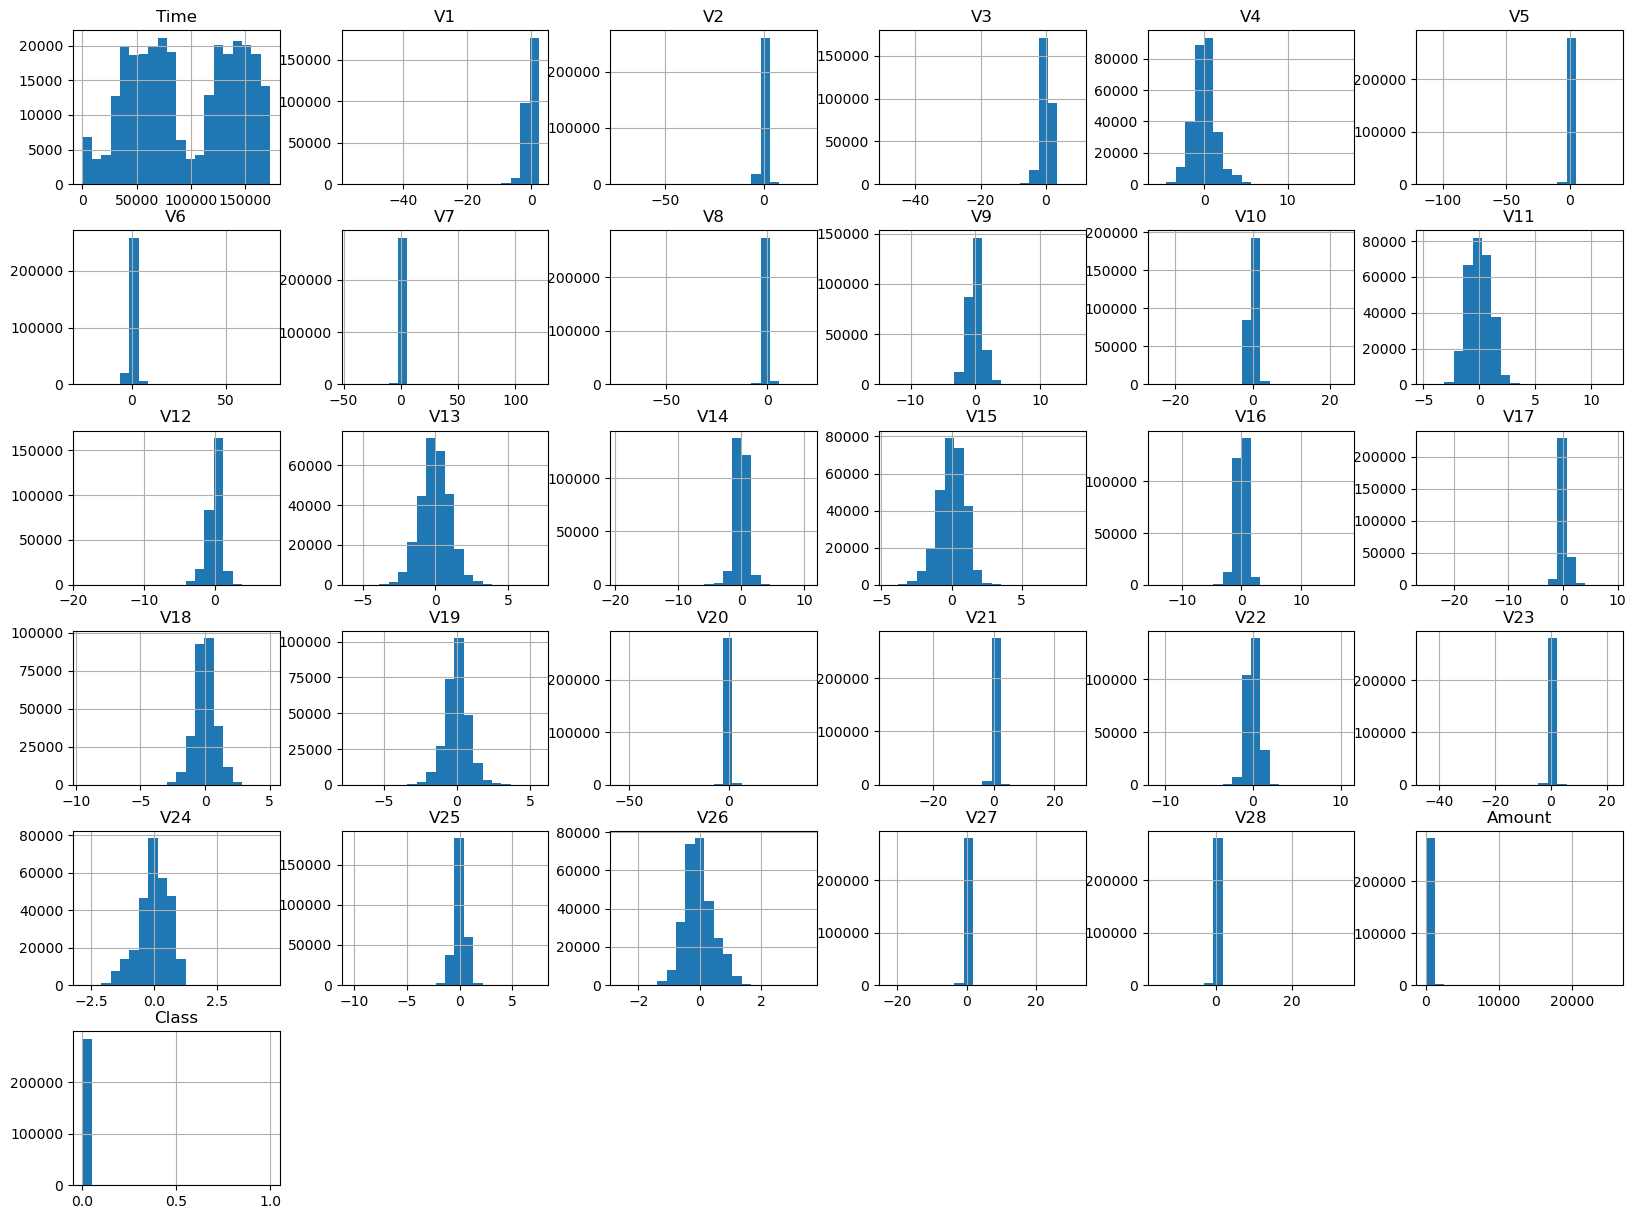

In [41]:
data.hist(bins=20, figsize=(20, 15))
plt.show()

In [42]:
target_column=data['Class']
def target_class_distribution(dataset, target_column):
    target_sum = len(dataset[target_column])
    detected_target = len(dataset[target_column][dataset[target_column] == 1])
    detected_percent = round(detected_target/target_sum *100,3)
    not_detected_target = len(dataset[target_column][dataset[target_column] == 0])
    non_detected_percent = round(not_detected_target/target_sum*100,3)
    print('Detected frauds: %s' %detected_target)
    print('Non-detected frauds: %s' %not_detected_target)
    print('Percentage of detected frauds: %s' %detected_percent)
    print('Percentage of not-detected frauds: %s' %non_detected_percent)

In [43]:
target_class_distribution(data, 'Class')

Detected frauds: 492
Non-detected frauds: 284315
Percentage of detected frauds: 0.173
Percentage of not-detected frauds: 99.827


In [45]:
fraudulent_data = data[data['Class'] == 1]

In [ ]:
#implementing the heatmap of Fraudulent data

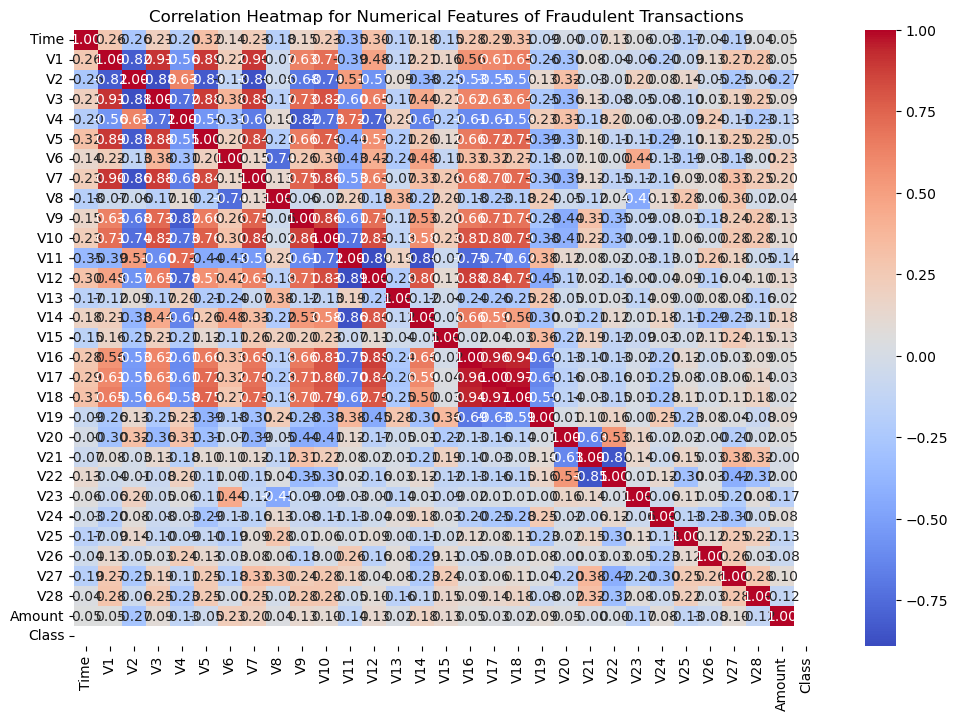

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(fraudulent_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Features of Fraudulent Transactions")
plt.show()

In [ ]:
#implementation of Random Forest

In [47]:
X = data.drop('Class', axis=1)
y = data['Class']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
rf_classifier = RandomForestClassifier(random_state=42)

In [50]:
%%time
rf_classifier.fit(X_train, y_train)

CPU times: total: 10min 39s
Wall time: 14min 50s


RandomForestClassifier(random_state=42)

In [51]:
%%time
y_pred = rf_classifier.predict(X_test)

CPU times: total: 1.2 s
Wall time: 2.16 s


In [52]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9996137776061234
